### Assignment Decision Tree

## Problem Statement

#### Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

NOTE:The solution shared through Github should contain the source code used and the screen shot of the output.

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Importing Dataset

Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv' 
dataset = pd.read_csv(Url)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = dataset.drop(columns=["PassengerId", 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'])
y = dataset.Survived

In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

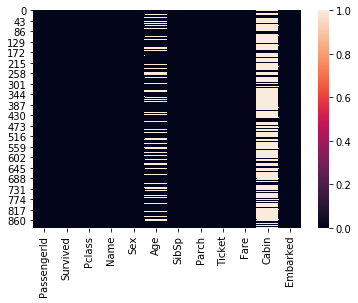

In [5]:
import seaborn as sns
sns.heatmap(dataset.isnull())

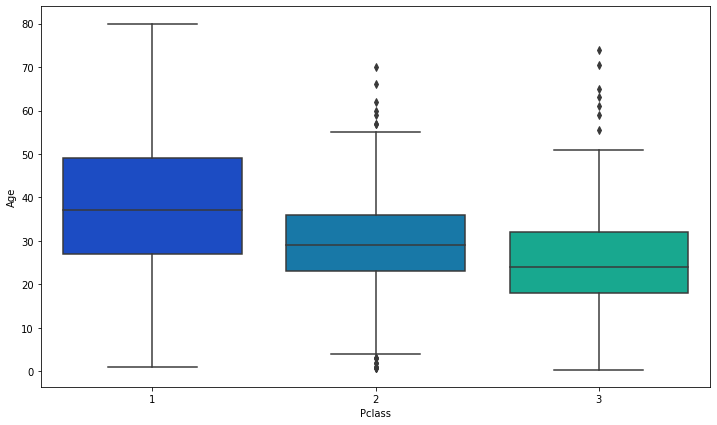

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y="Age", data=dataset, palette="winter")

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)
dataset['Pclass']
dataset['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
## You use only Pclass, Sex, Age, SibSp, Parch and Fare   

X = dataset.drop(columns=["PassengerId", 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'])
y = dataset.Survived

In [12]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,24.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [13]:
dataset.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [14]:
dataset.isnull().sum()
print(dataset['Age'].std())

13.244531842087222


In [15]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,24.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [17]:
## Handling Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop="first"),[0,1])], remainder="passthrough")
X = ct.fit_transform(X)
X = pd.DataFrame(X)
#X=X.drop(columns=[1])
X.head()

,0,1,2,3,4,5,6
0,0.0,1.0,1.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,35.0,0.0,0.0,8.0500


In [18]:
## Splitting Into Training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
## As instructed using Decision tree.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
## Predicting test Set 
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuraccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[94 16]
 [23 46]]
Accuraccuracy: 0.7821229050279329


In [22]:
## Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 50)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.69 %
Standard Deviation: 11.58 %


In [23]:
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 21)
num_leafs = np.arange(1, 100, 5)

param_grid = [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)

print(gs.best_params_)

0.8245109546165885
{'max_depth': 4, 'min_samples_leaf': 1}


In [24]:
my_model = gs.best_estimator_

my_model.fit(X_train, y_train)

y_pred = my_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuraccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[99 11]
 [23 46]]
Accuraccuracy: 0.8100558659217877
